# 【章末テスト - 問題 notebook】 分析レポート - ホテル Web レビューの分析


本レポートは以下の構成です。

- イントロダクションパート
- メインパート
- まとめパート



## イントロダクションパート
イントロダクションは以下の内容について記載する。

1. 分析が必要になった背景と目的
2. 分析で使用するデータ
3. 分析で設定された課題と分析の結果

### 1. 分析が必要になった背景と目的

#### 分析が必要になった背景

分析が必要になった背景は、競合の進出と属人的な施策からの脱却である。データをもとにした意思決定により、効果的な施策を打つ必要に迫られている。
先述したように**満足度に寄与する要因を特定し、満足度向上のための施策を考えること**を分析の具体的な方針とする。

#### 分析の目的

**自社保有のデータから顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすこと**を分析の具体的な方針とし、具体的な施策をホテルを管轄しているマネージャーに提案を行うことを目的とする。提案に際して、本分析レポートを提出する。

なお、過去の同系列ホテルの実績から**顧客のリピート数は満足度が高いほど頻度が多いことが分かっている**とする。





### 2. 今回使用するデータ
分析には、以下のデータを使用する。

▼ [hotel_reviews.csv](https://drive.google.com/file/d/1Sib9dgS_mmbShkL5VHbLGwOUbEIWLhhk/view?usp=sharing)

このデータは、サンプルサイズ 10000、カラム数 14 含まれるデータである。

データ内の変数は以下のようなものが含まれる。

|  変数  |  詳細  |
| ---- | ---- |
|  性別  |  男性・女性の 2 値  |
|  年齢  |  7 ~ 80 歳までの年齢  |
|  個人/グループ  |  旅行の形態。個人またはグループのどちらか  |
|  旅行の目的  |  学生・ビジネス・航空関係・旅行・その他の 5 種類  |
|  Wifi 設備  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  送迎の便利さ  |  0 ~ 5 の 6 段階評価  |
|  オンライン予約のしやすさ  |  0 ~ 5 の 6 段階評価  |
|  ホテルの立地  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  食事の満足度  |  0 ~ 5 の 6 段階評価  |
|  滞在時の快適さ  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  チェックイン・アウトの接客  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  その他のサービス  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |
|  清潔さ  |  0 ~ 5 の 6 段階評価  |
|  満足度  |  0 ~ 5 の 6 段階評価（ただし 0 の回答はなし）  |

今回分析全体の目的変数として**満足度**を使用し、その他の変数は説明変数として扱う。

### 3. 分析で設定された課題と分析の結果

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行う。
データ分析の結論として以下の実施を提案する。

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し
- 滞在時の快適さに関する追加分析
- 食事の満足度と清潔さに関する追加分析



## メインパート

メインパートでは、以下について記載する。

1. 代表値の比較
2. 相関分析と重回帰分析による要因の特定
3. クラスタリングよる対象の絞り込みと比較
4. 主成分分析による可視化
5. クラスタの代表値の比較による要因の特定と施策の考案



In [42]:
# 環境の準備 : 実行してください
!pip install -q japanize_matplotlib

In [43]:
# 環境の準備 : 実行してください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 環境の準備 : hotel_reviews.csv をアップロードして実行してください
import pandas as pd
df = pd.read_csv('hotel_reviews.csv')

### 定性的な代表値の比較
→ 該当する問題：**Q 1**

In [46]:
# 定性的なデータの確認（代表値の確認）
df.describe(include='all')

性別            年齢 個人/グループ  旅行の目的        Wifi設備        送迎の便利さ  \
count   10000  10000.000000   10000  10000  10000.000000  10000.000000   
unique      2           NaN       2      5           NaN           NaN   
top        女性           NaN    グループ     旅行           NaN           NaN   
freq     5031           NaN    6798   3041           NaN           NaN   
mean      NaN     39.486800     NaN    NaN      2.814000      3.104400   
std       NaN     15.175528     NaN    NaN      1.248984      1.482404   
min       NaN      7.000000     NaN    NaN      1.000000      0.000000   
25%       NaN     27.000000     NaN    NaN      2.000000      2.000000   
50%       NaN     40.000000     NaN    NaN      3.000000      3.000000   
75%       NaN     51.000000     NaN    NaN      4.000000      4.000000   
max       NaN     80.000000     NaN    NaN      5.000000      5.000000   

        オンライン予約のしやすさ        ホテルの立地       食事の満足度       滞在時の快適さ  チェックイン・アウトの接客  \
count   10000.000000  10000.000000  10000.00000  10000.000000   10000.000000   
unique           NaN           NaN          NaN           NaN            NaN   
top              NaN           NaN          NaN           NaN            NaN   
freq             NaN           NaN          NaN           NaN            NaN   
mean        2.841000      2.989100      3.20040      3.438700       3.293900   
std         1.331201      1.274654      1.32658      1.316441       1.261936   
min         0.000000      1.000000      0.00000      1.000000       1.000000   
25%         2.000000      2.000000      2.00000      2.000000       2.000000   
50%         3.000000      3.000000      3.00000      4.000000       3.000000   
75%         4.000000      4.000000      4.00000      5.000000       4.000000   
max         5.000000      5.000000      5.00000      5.000000       5.000000   

            その他のサービス           清潔さ           満足度  
count   10000.000000  10000.000000  10000.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean        3.646200      3.281900      3.201900  
std         1.168829      1.310116      0.967176  
min         1.000000      0.000000      1.000000  
25%         3.000000      2.000000      3.000000  
50%         4.000000      3.000000      3.000000  
75%         5.000000      4.000000      4.000000  
max         5.000000      5.000000      5.000000

:< テストの正解選択肢や、読み取れたことをまとめてください >

・変数「性別」について男女の数の差はさほどない

・変数「個人/グループ」について、グループの方が多い

・変数「年齢」について、利用顧客の大半は一般的な学生よりも高い年齢である

・変数「満足度」について全体平均は3.2(少数第2位まで)

### 相関分析と重回帰分析による要因の特定
#### 相関分析
→ 該当する問題：**Q 2**

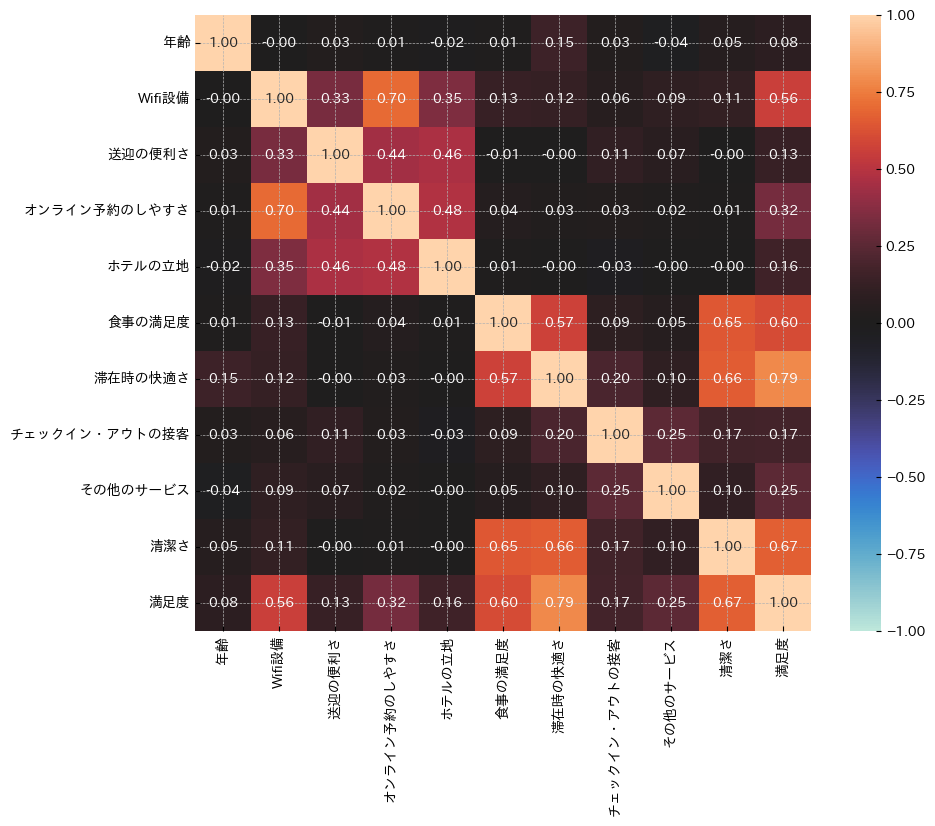

In [47]:
# 相関分析
sns.heatmap(df.corr(method="spearman"),
            annot=True, square=True,
            vmax=1,
            vmin=-1,
            center=0,
            fmt='.2f');


In [48]:
# `満足度`との相関が高い変数を確認する
tmp = df.corr()['満足度']
tmp[tmp.abs()>0.5].sort_values(ascending=False)


満足度        1.000000
滞在時の快適さ    0.793672
清潔さ        0.678053
食事の満足度     0.612857
Wifi設備     0.575273
Name: 満足度, dtype: float64

In [49]:
# 無相関検定による統計的有意性の確認

print(f'滞在時の快適さ✕満足度:{stats.spearmanr(df["滞在時の快適さ"], df["満足度"])}')
print(f'清潔さ✕満足度:{stats.spearmanr(df["清潔さ"], df["満足度"])}')
print(f'食事の満足度✕満足度:{stats.spearmanr(df["食事の満足度"], df["満足度"])}')
print(f'Wifi設備✕満足度:{stats.spearmanr(df["Wifi設備"], df["満足度"])}')

滞在時の快適さ✕満足度:SignificanceResult(statistic=0.7886695703694965, pvalue=0.0)
清潔さ✕満足度:SignificanceResult(statistic=0.6674895996550014, pvalue=0.0)
食事の満足度✕満足度:SignificanceResult(statistic=0.6021781087989913, pvalue=0.0)
Wifi設備✕満足度:SignificanceResult(statistic=0.5613474726971944, pvalue=0.0)


< テストの正解選択肢や、読み取れたことをまとめてください >

・変数「年齢」はその他の変数との相関が低いため、満足度には関連性のない変数と判断できる

・変数「Wifi設備」　「送迎の便利さ」　「オンライン予約のしやすさ」　「ホテルの立地」は互いに0.3~0.7程度の相関係数を取る

・変数「食事の満足度」　「滞在時の快適さ」　「清潔さ」は互いに0.5~0.7程度の相関係数を取る

・変数「満足度」とは、「滞在時の快適さ」　「清潔さ」　「食事の満足度」　「Wifi設備」の順で相関が高い

・変数「チェックイン・アウトの接客」　「その他のサービス」はその他の変数との相関が低い。「満足度」との相関も低い。よって関連性の低い変数だと想定できる。

・変数「滞在時の快適さ」　「清潔さ」　「食事の満足度」　「Wifi設備」は満足度が変動する要因として関連性の高い変数だと言える



#### 重回帰分析
→ 該当する問題：**Q 3**

In [50]:
# 変数の選択: 目的変数→満足度、入力変数→年齢と満足度以外の数値データ

# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

x = _df.drop(['満足度', '年齢'], axis=1)
y = _df['満足度']
x.head(2)

Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  滞在時の快適さ  チェックイン・アウトの接客  \
0       4       4             4       4       3        4              4   
1       4       5             4       4       1        1              5   

   その他のサービス  清潔さ  性別_男性  個人/グループ_個人  旅行の目的_ビジネス  旅行の目的_学生  旅行の目的_旅行  \
0         4    4      0           0           0         1         0   
1         4    1      0           1           1         0         0   

   旅行の目的_航空関係  
0           0  
1           0

In [51]:
# 変数の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled,
                       columns=_df.drop(['満足度', '年齢'],
                                        axis=1).columns)
feature.head(2)

Wifi設備    送迎の便利さ  オンライン予約のしやすさ    ホテルの立地    食事の満足度   滞在時の快適さ  \
0  0.94962  0.604184      0.870686  0.793117 -0.151073  0.426398   
1  0.94962  1.278798      0.870686  0.793117 -1.658784 -1.852588   

   チェックイン・アウトの接客  その他のサービス       清潔さ     性別_男性  個人/グループ_個人  旅行の目的_ビジネス  \
0       0.559565  0.302711  0.548147 -0.993819   -0.686310   -0.512160   
1       1.352038  0.302711 -1.741841 -0.993819    1.457068    1.952516   

   旅行の目的_学生  旅行の目的_旅行  旅行の目的_航空関係  
0  1.698974 -0.661051   -0.400788  
1 -0.588590 -0.661051   -0.400788

In [52]:
# 重回帰分析を実行

np.random.seed(0) # 乱数の固定
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()


In [53]:
# 分析結果の表示
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7392.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:43:26   Log-Likelihood:                -1386.8
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9984   BIC:                             2921.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1150.986      0.000       3.196       3.207
Wifi設備            0.4634      0.004    118.012      0.000       0.456       0.471
送迎の便利さ           -0.0157      0.004     -4.420      0.000      -0.023      -0.009
オンライン予約のしやすさ     -0.0345      0.004     -8.014      0.000      -0.043      -0.026
ホテルの立地            0.0118      0.003      3.511      0.000       0.005       0.018
食事の満足度            0.1150      0.004     29.997      0.000       0.107       0.122
滞在時の快適さ           0.5267      0.004    133.818      0.000       0.519       0.534
チェックイン・アウトの接客    -0.0300      0.003    -10.178      0.000      -0.036      -0.024
その他のサービス          0.1436      0.003     49.638      0.000       0.138       0.149
清潔さ               0.1592      0.004     37.630      0.000       0.151       0.168
性別_男性             0.0007      0.003      0.234      0.815      -0.005       0.006
個人/グループ_個人       -0.0245      0.003     -7.939      0.000      -0.031      -0.018
旅行の目的_ビジネス        0.0008      0.004      0.178      0.858      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.838      0.402      -0.013       0.005
旅行の目的_旅行          0.0023      0.005      0.482      0.630      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.291      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3099.467   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.431
Skew:                           0.043   Prob(JB):                    5.20e-102
Kurtosis:                       1.945   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

< テストの正解選択肢や、読み取れたことをまとめてください >

・変数「滞在時の快適さ」、「Wifi設備」　「その他サービス」　「清潔さ」　「食事の満足度」の順で重要性が高い

・相関分析結果と合わせて、「滞在時の快適さ」　「Wifi設備」　「清潔さ」　「食事の満足度」は重要な変数と判断できる

### クラスタリングよる対象の絞り込みと比較

→ 該当する問題：**Q 4**

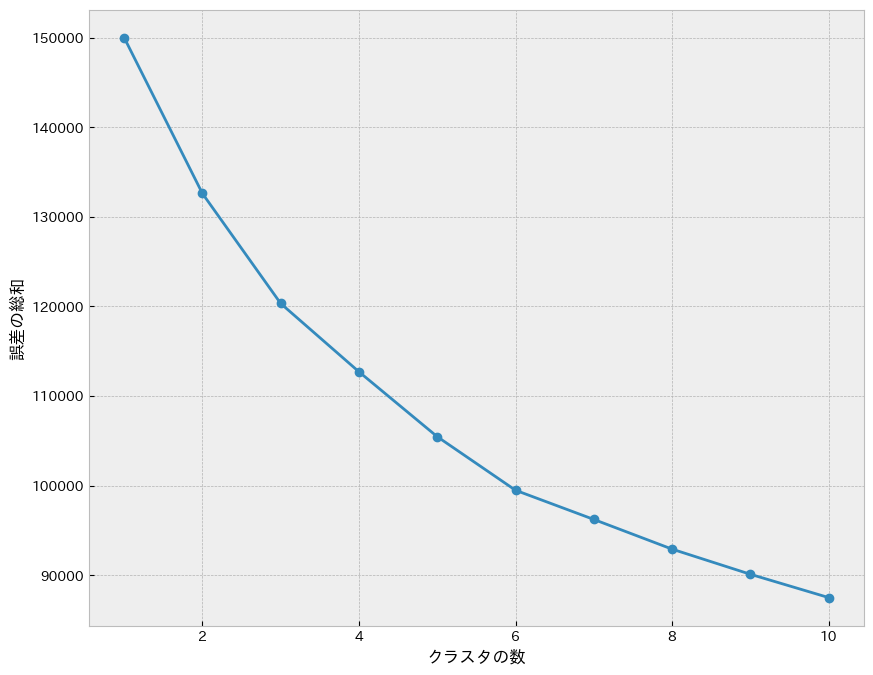

In [54]:
# クラスタリング : エルボー法による最適なクラスタ数の計算

from sklearn.cluster import KMeans

sse = []

for i  in range(1,11):
    kmeans = KMeans(
        n_clusters=i,
        n_init=10,
        random_state=0
        )

    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [55]:
# クラスタリングの実行 : エルボー法で最適なクラスタ数を指定して実装してください。

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[1 0 0 ... 1 1 2]


In [56]:
# 実行してください
df_clustering = df.copy() # df のデータをコピー

In [57]:
# 変数名 `cluster` で df_clustering にクラスタリングの結果を追加

# cluster、満足度のカラム追加
df_clustering['cluster'] = cluster
df_clustering.head(2)

性別  年齢 個人/グループ 旅行の目的  Wifi設備  送迎の便利さ  オンライン予約のしやすさ  ホテルの立地  食事の満足度  \
0  女性  50    グループ    学生       4       4             4       4       3   
1  女性  35      個人  ビジネス       4       5             4       4       1   

   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス  清潔さ  満足度  cluster  
0        4              4         4    4    4        1  
1        1              5         4    1    2        0

In [58]:
# 変数 `cluster` 毎に groupby() でまとめる

# クラスターごとにグループ分け
groups = df_clustering.groupby('cluster')
groups.size()

cluster
0    3259
1    3627
2    3114
dtype: int64

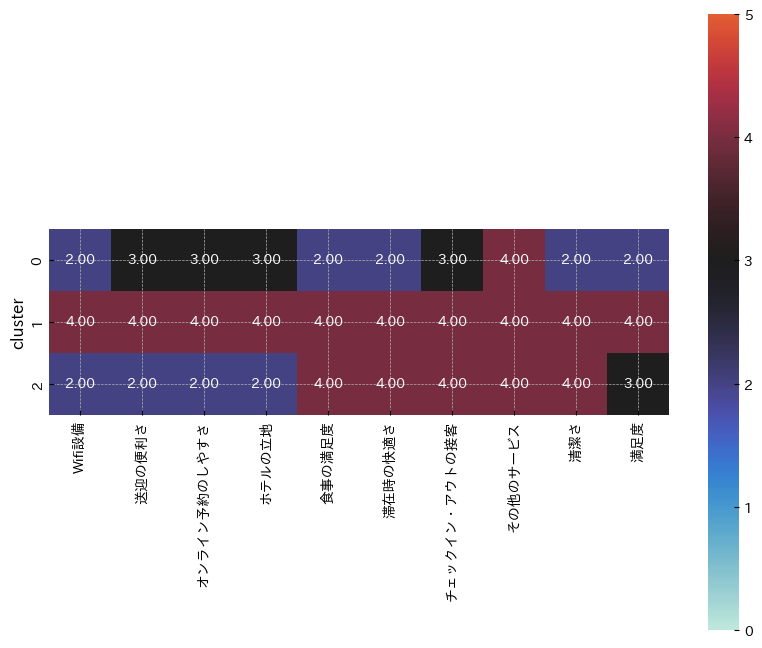

In [59]:
# クラスタ毎の各項目の代表値を見る（中央値）: 変数`年齢`は省く
median = groups.median().drop('年齢', axis=1)

sns.heatmap(
    median,
    annot=True,
    square=True,
    vmin=0.0,
    vmax=5.0,
    center=3.0,
    fmt='.2f'
    );

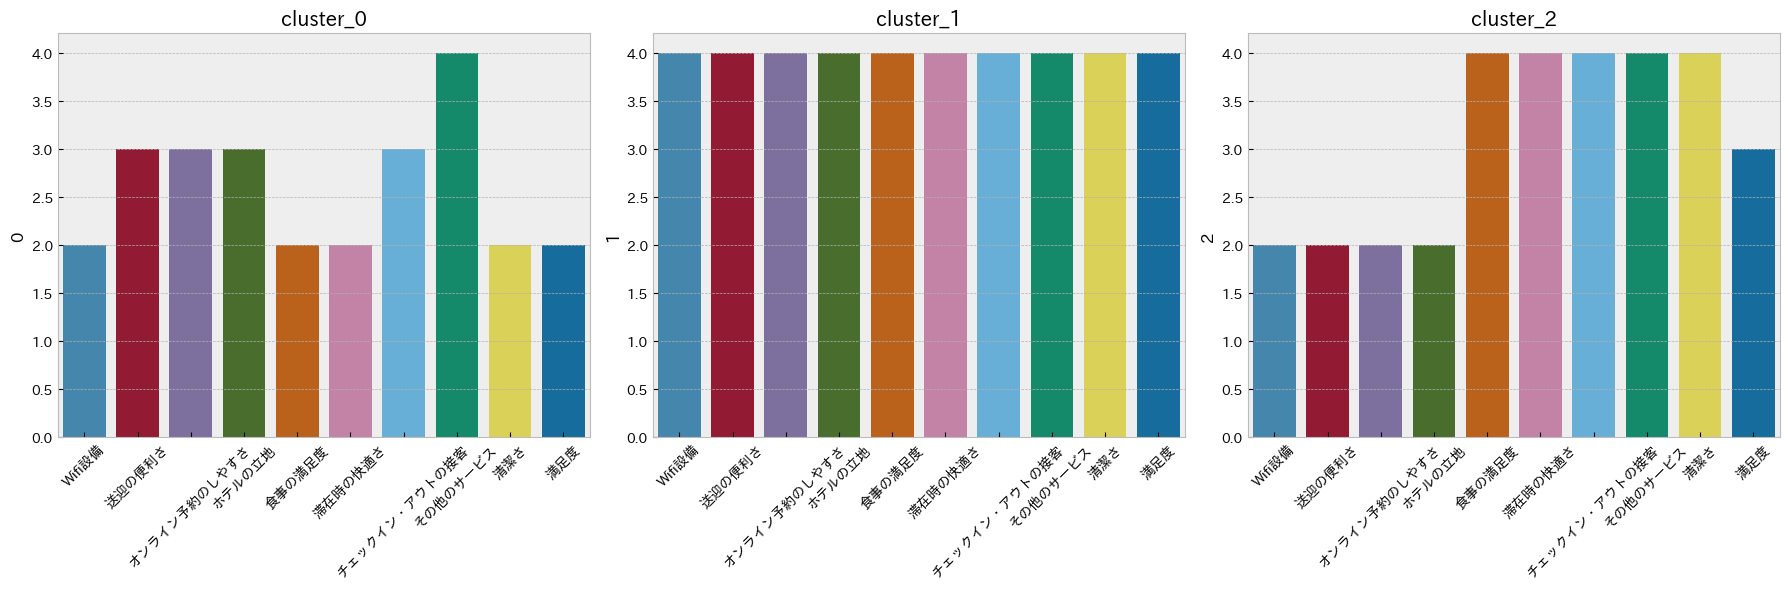

In [60]:
# 実行してください
num = kmeans.n_clusters

plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=median.columns, y=median.loc[n])
    plt.xticks(rotation=45)
    plt.tight_layout()

< テストの正解選択肢や、読み取れたことをまとめてください >

・説明文1

・説明文2

・説明文5

### 主成分分析による可視化
主成分分析も併用して用い、クラスタ毎の傾向を可視化する。


In [61]:
# 主成分分析 : 実行してください
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
# 主成分分析 : 実行してください
df_numeric = df.select_dtypes(include='number')
x = df_numeric.drop(['年齢', '満足度'], axis=1)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [63]:
# 主成分分析 : 実行してください
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)

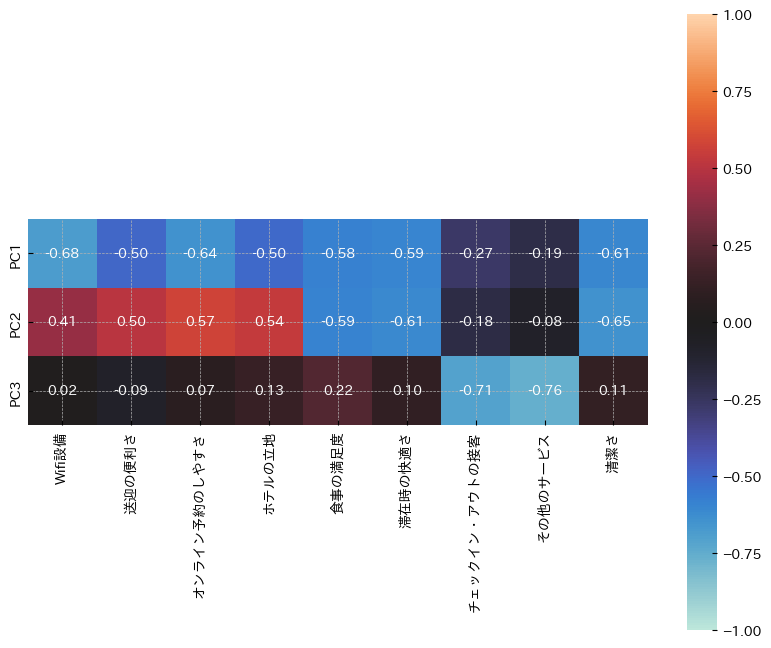

In [64]:
# 主成分分析 : 実行してください
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3),
            vmax=1.0,
            center=0.0,
            vmin=-1.0,
            square=True,
            annot=True,
            fmt='.2f');

主成分はそれぞれ、以下のように定義できる。

- 第一主成分 : 総合評価
- 第二主成分 : ホテルの環境評価
- 第三主成分 : 接客の評価

クラスタと満足度がそれぞれのサンプル毎で判別ができるように、求めた第一主成分と第二主成分をそれぞれ、x 軸 y 軸として可視化する。

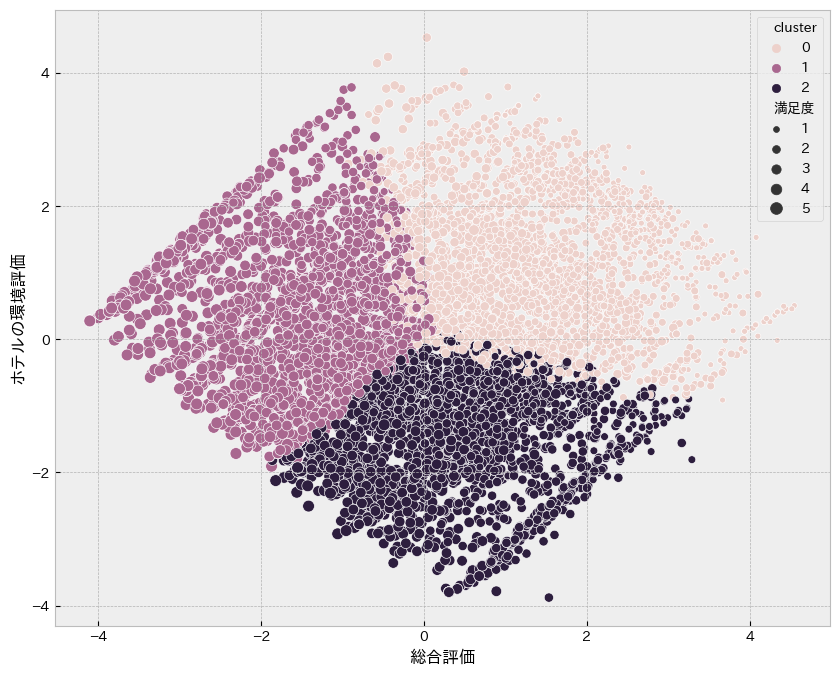

In [65]:
# 主成分分析 : 実行してください
feature_df = pd.DataFrame(feature, columns=['総合評価',
                                            'ホテルの環境評価',
                                            '接客の評価'])
new_data = pd.concat([df_clustering, feature_df], axis=1)

sns.scatterplot(x='総合評価',
                y='ホテルの環境評価',
                hue='cluster',
                size='満足度',
                data=new_data);

上記の様に、各クラスタは基準を持って、　3　つのグループに分割できることが分かる。特に第二主成分によって、クラスタ 1, 2 は分割可能に伺える。
よって、大枠では、`Wifi 設備`、`送迎の便利さ`、`オンライン予約のしやすさ`、`ホテルの立地`の評点群、または、`食事の満足度`、`滞在時の快適さ`、`清潔さ`の評点群のどちらかへに評価が偏る傾向がある事がわかる。


### クラスタの代表値の比較による要因の特定と施策の考案
→ 該当する問題：**Q 5**

ここまでで、大枠の傾向と、全体傾向としての項目の重要度を順位付けて判断することができた。
先程、クラスタリングにより分けたクラスタ毎に傾向より詳しく読み取り、具体的な施策を考案するまでを分析する。
基本的な方針として、各クラスタの特徴を踏まえた上で、各クラスタ毎でも共通する項目、逆に偏りのある項目、クラスタ内で目立つ方よりに注目し分析を進める。

まずは各クラスタの相関分析からおこなう。

In [66]:
# 各クラスタのデータを取得してください
df_cluster0 = groups.get_group(0).reset_index(drop=True)
df_cluster1 = groups.get_group(1).reset_index(drop=True)
df_cluster2 = groups.get_group(2).reset_index(drop=True)

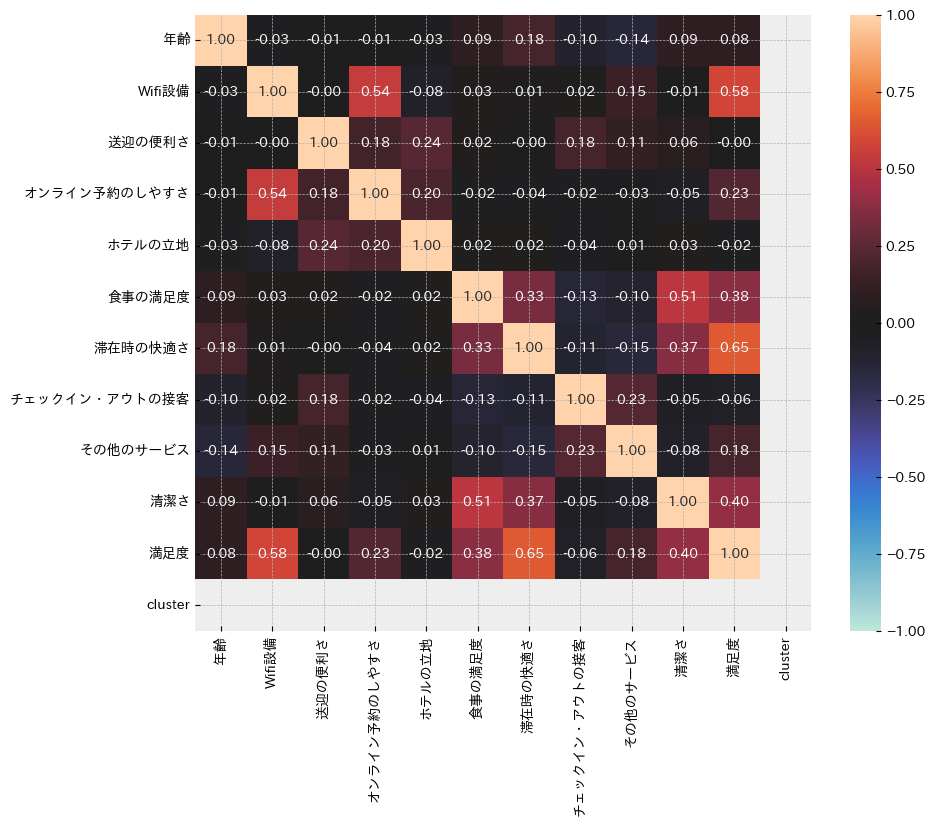

In [67]:
# クラスタ 0 （df_cluster0）の相関

sns.heatmap(df_cluster0.corr(),
            annot=True,
            square=True,
            vmax=1,
            vmin=-1,
            center=0,
            fmt='.2f');

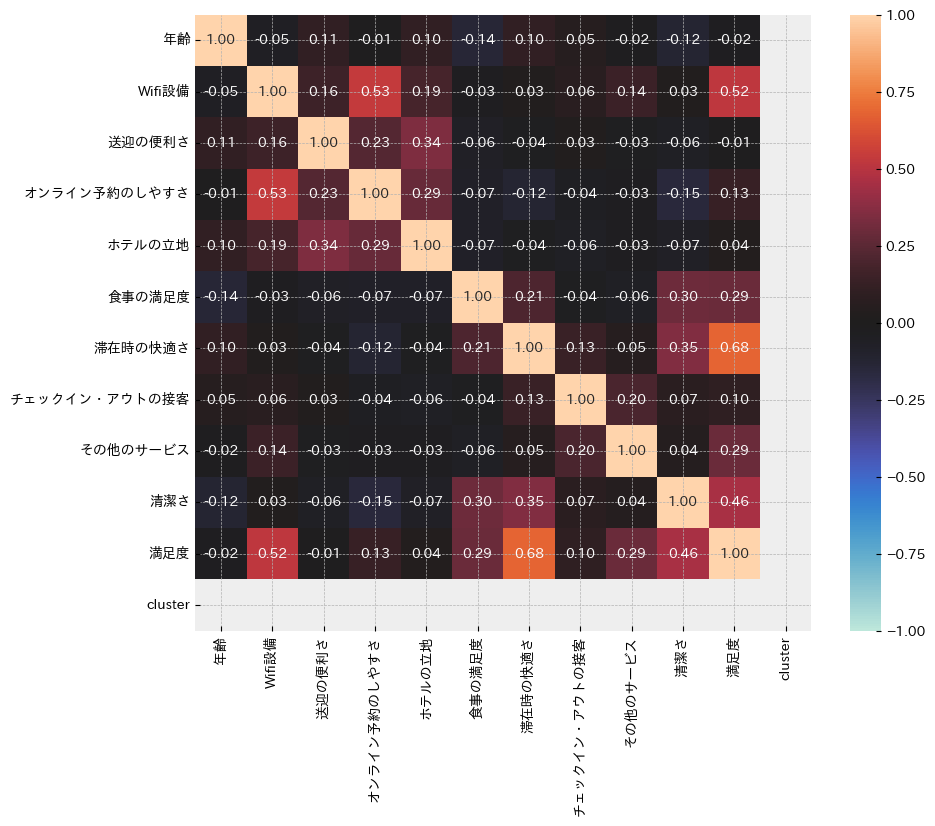

In [68]:
# クラスタ 1 （df_cluster1）の相関

sns.heatmap(df_cluster1.corr(),
            annot=True,
            square=True,
            vmax=1,
            vmin=-1,
            center=0,
            fmt='.2f');

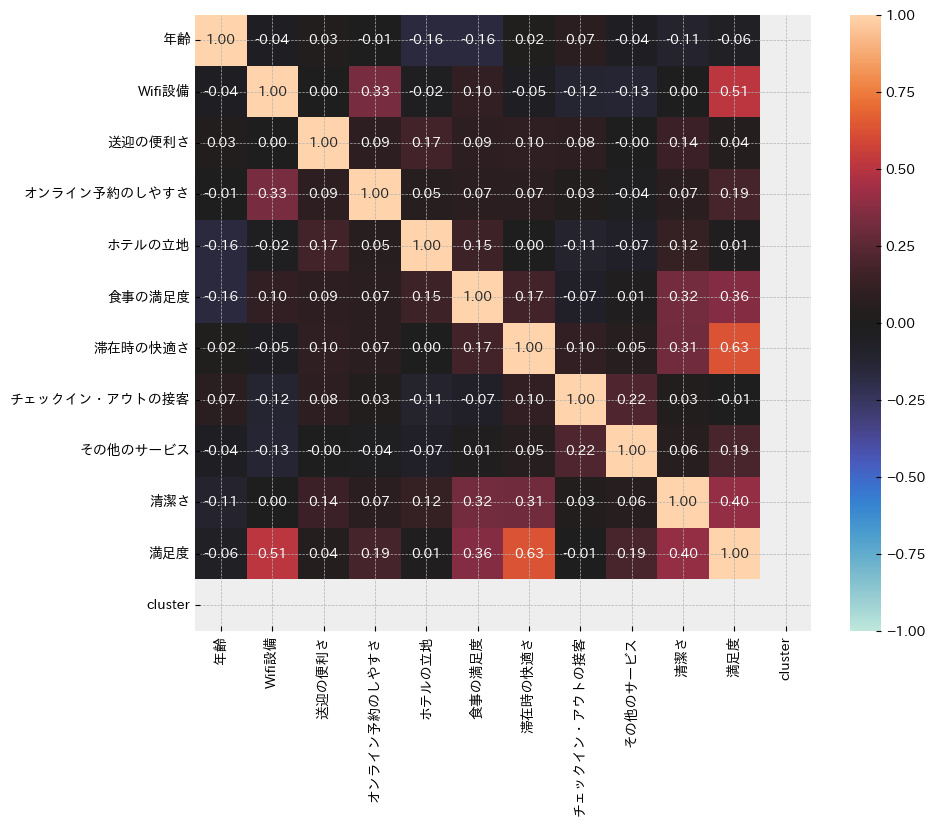

In [69]:
# クラスタ 2 （df_cluster2）の相関

sns.heatmap(df_cluster2.corr(),
            annot=True,
            square=True,
            vmax=1,
            vmin=-1,
            center=0,
            fmt='.2f');

顧客の属性による評価の違いも考慮して、定性的に代表値の比較を行う。
代表値には中央値を使用する。

In [70]:
# クラスタ 0 の満足度内訳 : 実行してください
df_cluster0['満足度'].value_counts()

2    1687
3    1130
1     393
4      49
Name: 満足度, dtype: int64

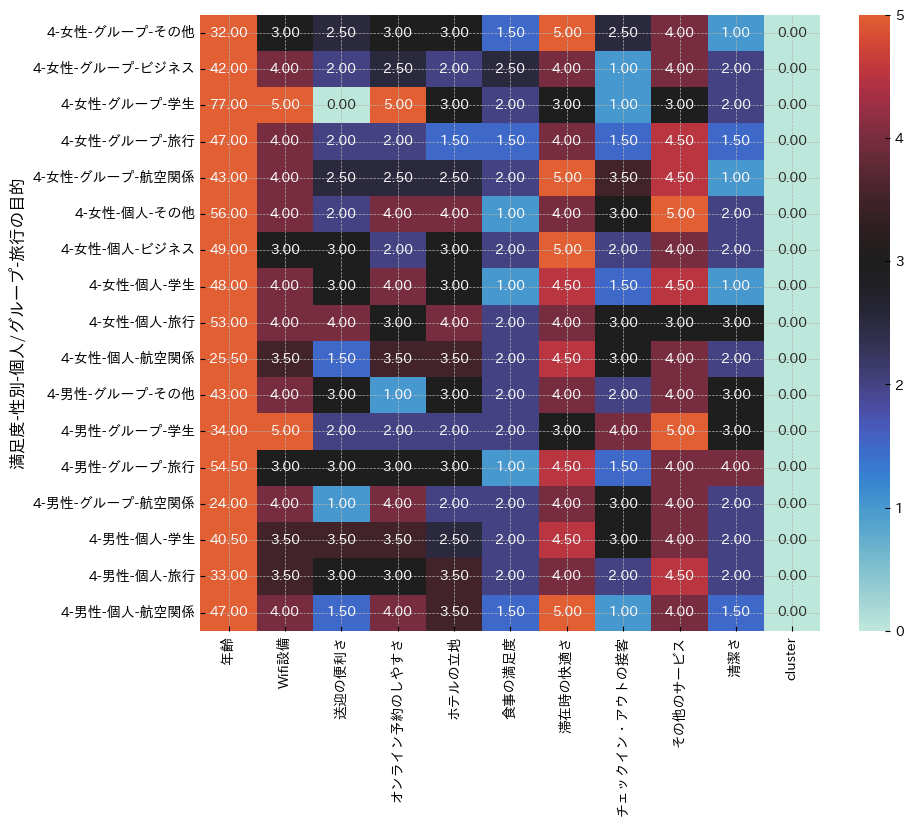

In [71]:
#クラスタ 0 （cluster 0 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。
_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==4 or 満足度==5'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [72]:
# クラスタ 1 の満足度内訳  : 実行してください
df_cluster1['満足度'].value_counts()

4    2171
3     772
5     647
2      37
Name: 満足度, dtype: int64

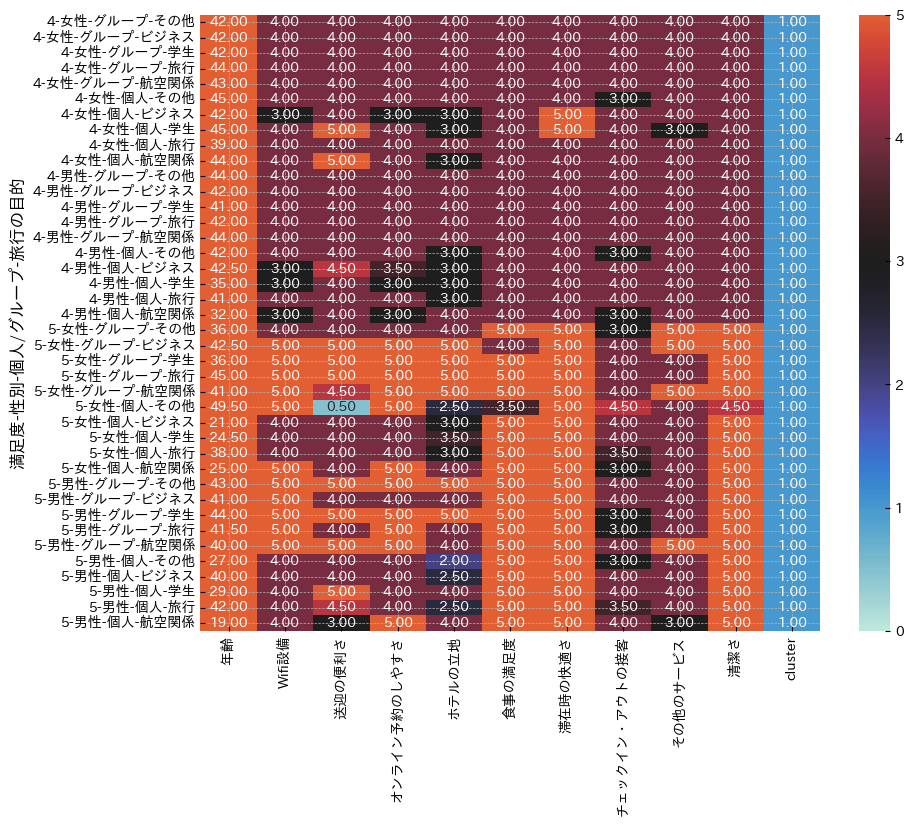

In [73]:
#クラスタ 1 （cluster 1 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。
_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==4 or 満足度==5'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [74]:
# クラスタ 2 の満足度内訳  : 実行してください
df_cluster2['満足度'].value_counts()

3    1664
4    1129
2     252
5      69
Name: 満足度, dtype: int64

In [75]:
#クラスタ 2 （cluster 2 ）内の満足度高評価サンプルの代表値（中央値）比較
# 「満足度が 4 または 5」という条件を追記してください。
_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==4 or 満足度==5'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

各クラスタにおいて、満足度が高評価であるサンプルに共通しているのは、`Wifi 設備`、`滞在時の快適さ`の評点が高いことである。
どの様なお客様に対しても共通して効果が大きいのは上記 2 つに対して改善策を講じることだと判断できる。



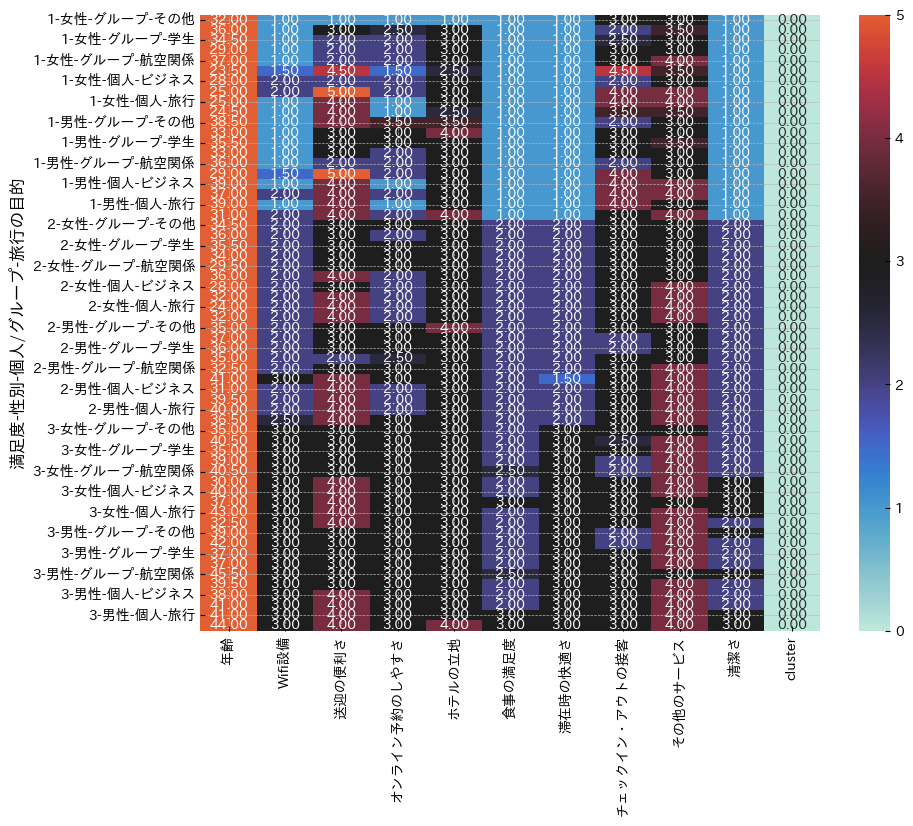

In [76]:
#クラスタ 0 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較
# 満足度 4,5 の場合の実装を見本に実装してみてください。

_df = df_cluster0.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==1 or 満足度==2 or 満足度==3'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

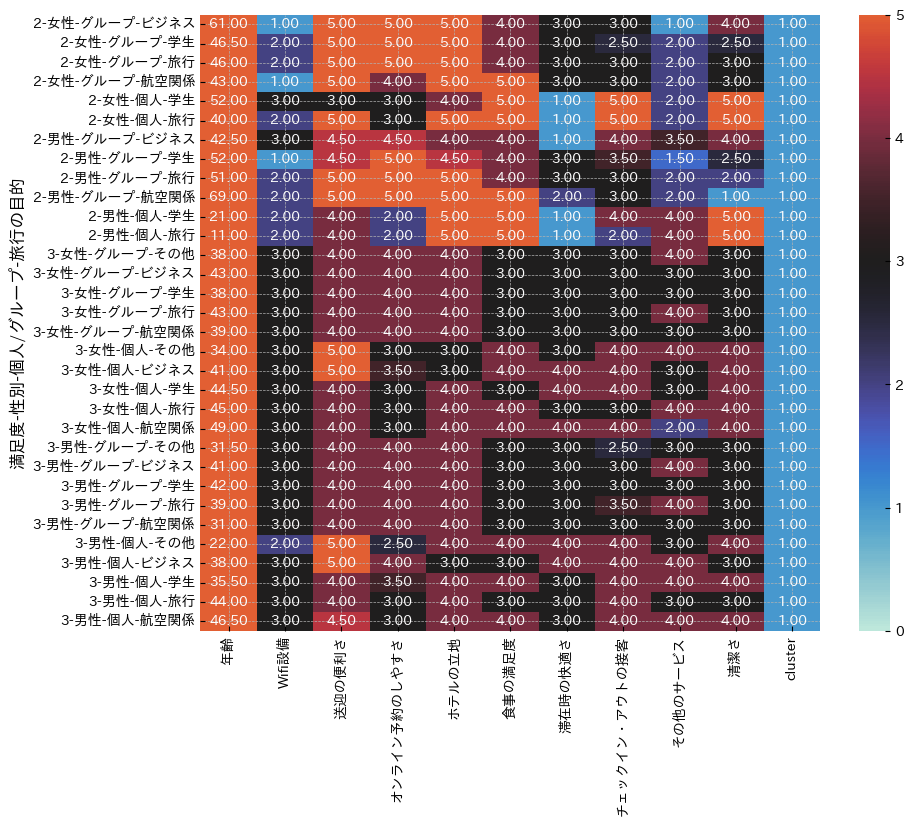

In [77]:
#クラスタ 1 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較
# 満足度 4,5 の場合の実装を見本に実装してみてください。

_df = df_cluster1.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==1 or 満足度==2 or 満足度==3'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

In [78]:
#クラスタ 2 内の満足度低評価（満足度 1,2,3）サンプルの代表値（中央値）比較
# 満足度 4,5 の場合の実装を見本に実装してみてください。

_df = df_cluster2.groupby(['満足度','性別', '個人/グループ', '旅行の目的'])
_df = _df.median().query('満足度==1 or 満足度==2 or 満足度==3'),

sns.heatmap(_df[0],
            vmin=0,
            vmax=5,
            center=3,
            annot=True,
            fmt='.2f');

上記それぞれの結果を踏まえ各要因を以下の 4 つに分類する。

1. 優先度高く改善を行う項目
2. 第二優先項目として改善を行う項目
3. 現在のサービス品質の継続を目指す項目
4. 優先度を下げるまたは考慮しない項目


1. 優先度高く改善を行う項目
→ (A) Wifi設備、(B)：滞在時の快適さ

2. 第二優先項目として改善を行う項目
→ (C)：食事の満足度、(D)：清潔さ


3. 現在のサービス品質の維持を目指す項目
→ (E)：送迎の便利さ、(F)：チェックイン・アウトの接客、(G)：その他のサービス


4. 優先度を下げるまたは考慮しない項目
→ (H)：ホテルの立地、(I)：オンライン予約のしやすさ

< テストの正解選択肢や、読み取れたことをまとめてください >

テストの正解選択肢は上記の通りである。

## まとめパート

本分析では、hotel_reviews.csv を使用して、顧客の満足度に寄与している要因を見つけ出し、満足度向上のための施策を考え、リピート顧客を増やすことを目的として分析を行った。

データ分析の結論として以下の実施を提案する。

- 個人用客室の Wifi 設備の確認と必要に応じて通信設備の見直し
- 滞在時の快適さに関する追加分析
- 食事の満足度と清潔さに関する追加分析
